In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [104]:
rcParams['font.size']=16

In [98]:
from leap.lib.xsc import loading,leveling

In [6]:
import pandas as pd
import cPickle

In [7]:
with open('power_spectra.pkl') as fh:
    df = cPickle.load(fh)

In [8]:
df.shape

(4165, 5)

In [9]:
rawpath = '/home/gjones/ebexdata/ld2012/flight/raw/acs_v0-0/'

In [10]:
ims = loading.get_images_list(rawpath)

In [133]:
def plot_row(row):
    fn = row.filename
    im = [im for im in ims if im.filename==fn][0]
    data = loading.get_image_array_from_filename(rawpath,im.which,im.filename,apply_flat_field_correction=True)
    data = leveling.level(data)
    fig,(ax1,ax2)= subplots(1,2,figsize=(18,8))
    ax1.imshow(data,cmap=cm.gray,origin='lower')
    ax1.set_xlabel('pixels')
    ax2.loglog(row.kr,row.prr)
    ax2.loglog(row.kr,row.prr[48]*(row.kr/row.kr[48])**-4,label='$P(k)\propto k^{-4}$')
    ax2.set_ylabel('|FFT|$^2$')
    ax2.set_xlabel('k (cycles/meter)')
    ax2.set_ylim(row.prr.min()*.9,row.prr.max()*1.1)
    ax2.legend(loc='upper right')
    ax1.set_title(row.filename)

In [47]:
data = loading.get_image_array_from_filename(rawpath,row.which,row.filename,apply_flat_field_correction=True,adjust_flat_field=False)

In [48]:
data.dtype

dtype('float64')

In [49]:
h,b = np.histogram(data.flatten(),bins=np.arange(0,4096))

# Look at a random selection of spectra
Define some features: Power at $10^{-3}$ cycles/m, $10^{-2}$, $10^{-1}$

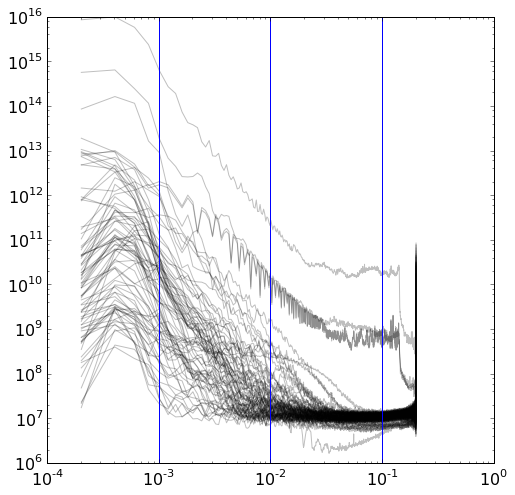

In [110]:
figure(figsize=(8,8))
for k,row in df.iterrows():
    if k % 51==0:
        loglog(row.kr,row.prr,'k',alpha=.25)
ax = gca()
ax.axvline(1e-3)
ax.axvline(1e-2)
ax.axvline(1e-1)


In [16]:
print "1e-3:",np.argmin(np.abs(row.kr-1e-3))
print "1e-2:",np.argmin(np.abs(row.kr-1e-2))
print "1e-1:",np.argmin(np.abs(row.kr-1e-1))

1e-3: 4
1e-2: 48
1e-1: 493


In [17]:
p3 = []
p2 = []
p1 = []
for k,row in df.iterrows():
    p3.append(row.prr[4])
    p2.append(row.prr[48])
    p1.append(row.prr[493])
df['p3'] = np.array(p3)
df['p2'] = np.array(p2)
df['p1'] = np.array(p1)


# Look at the feature space

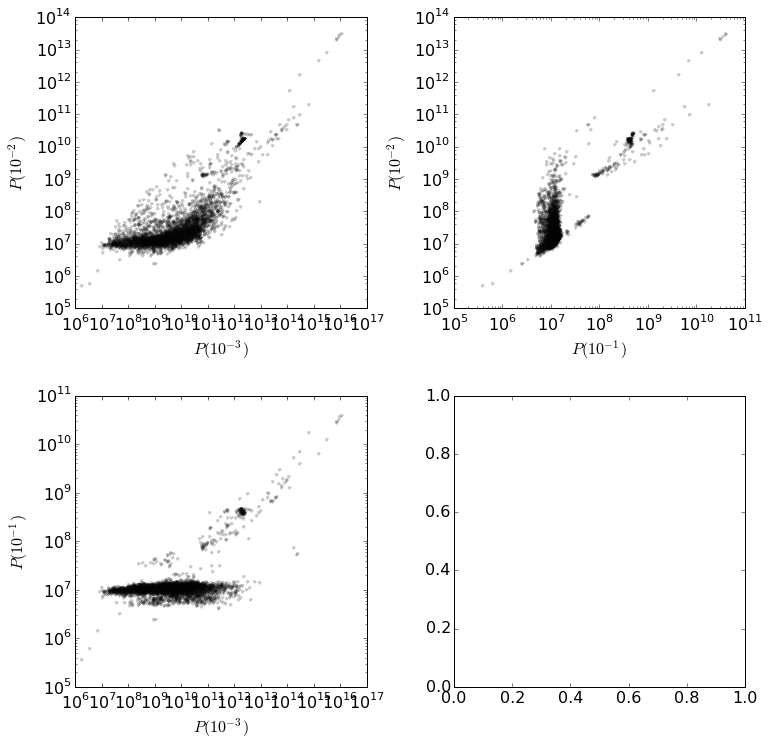

In [132]:
fig,axs = subplots(2,2,figsize=(12,12))
fig.subplots_adjust(wspace=0.3,hspace=0.3)
axs[0,0].loglog(df.p3,df.p2,'k.',alpha=0.2)
axs[0,0].set_xlabel('$P(10^{-3})$')
axs[0,0].set_ylabel('$P(10^{-2})$')
axs[1,0].loglog(df.p3,df.p1,'k.',alpha=0.2)
axs[1,0].set_xlabel('$P(10^{-3})$')
axs[1,0].set_ylabel('$P(10^{-1})$')
axs[0,1].loglog(df.p1,df.p2,'k.',alpha=0.2)
axs[0,1].set_xlabel('$P(10^{-1})$')
axs[0,1].set_ylabel('$P(10^{-2})$')
#axs[1,1].loglog(df.p3,df.p1,'k.',alpha=0.2)
#axs[1,1].set_xlabel('$P(10^{-3})$')
#axs[1,1].set_ylabel('$P(10^{-1})$')
#axs[1,1].set_ylim(3e6,5e7)

# Make cuts in feature space and on ratio of features

In [138]:
dd = df[(df.p2/df.p1 > 3e1) &(df.p2/df.p1 < 1e4) & (df.p3 < 1e14)& (df.p3/df.p2 > 50) & (df.p1 < 5e7)]

In [139]:
dd.shape

(105, 8)

# Resulting spectra

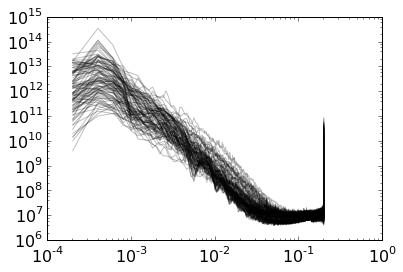

In [140]:
for k,row in dd.iterrows():
    loglog(row.kr,row.prr,'k',alpha=.25)

#View a sample of images and spectra

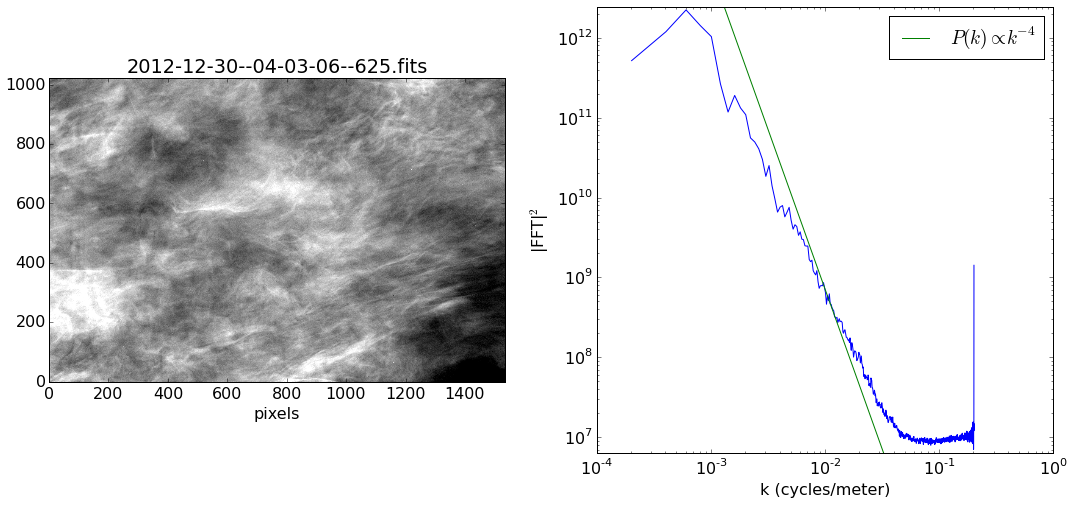

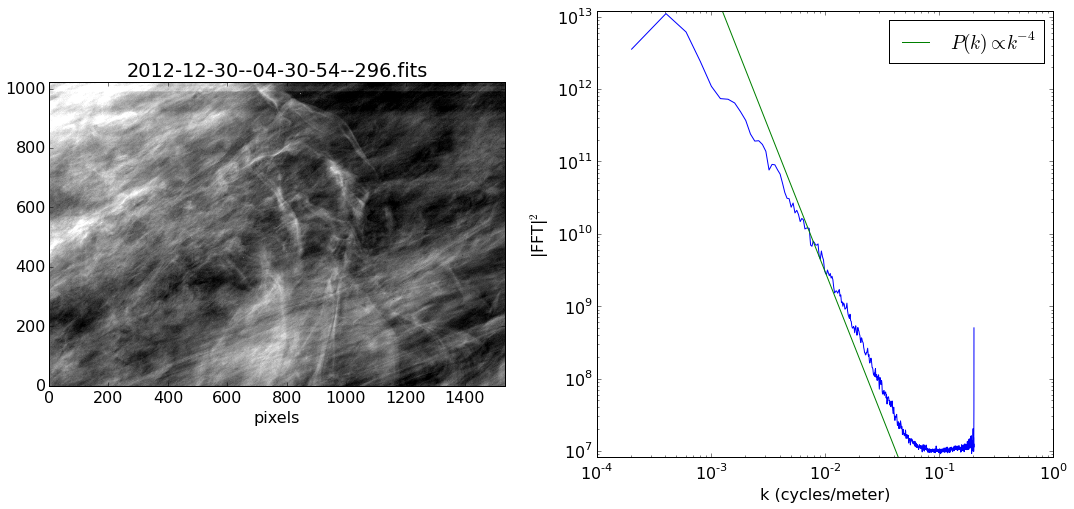

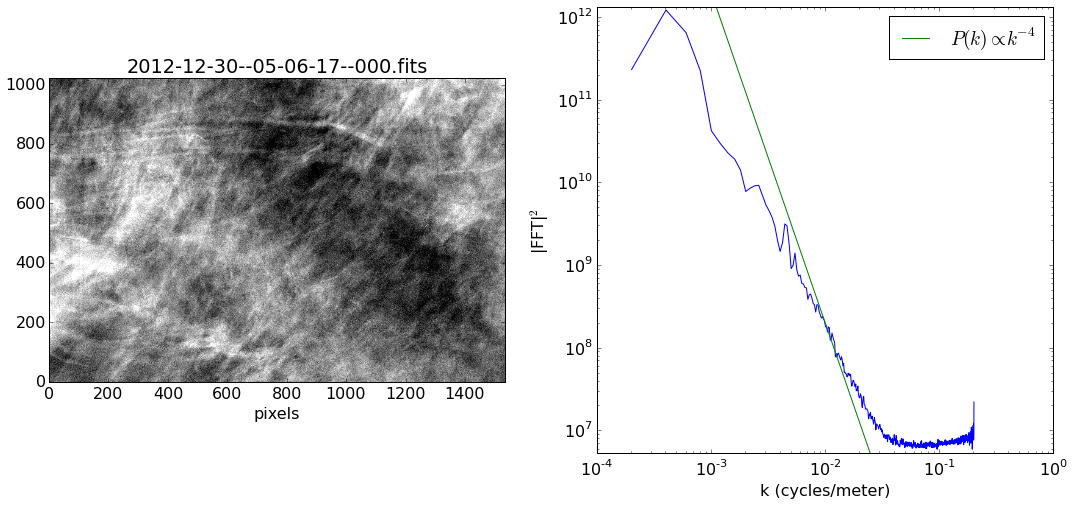

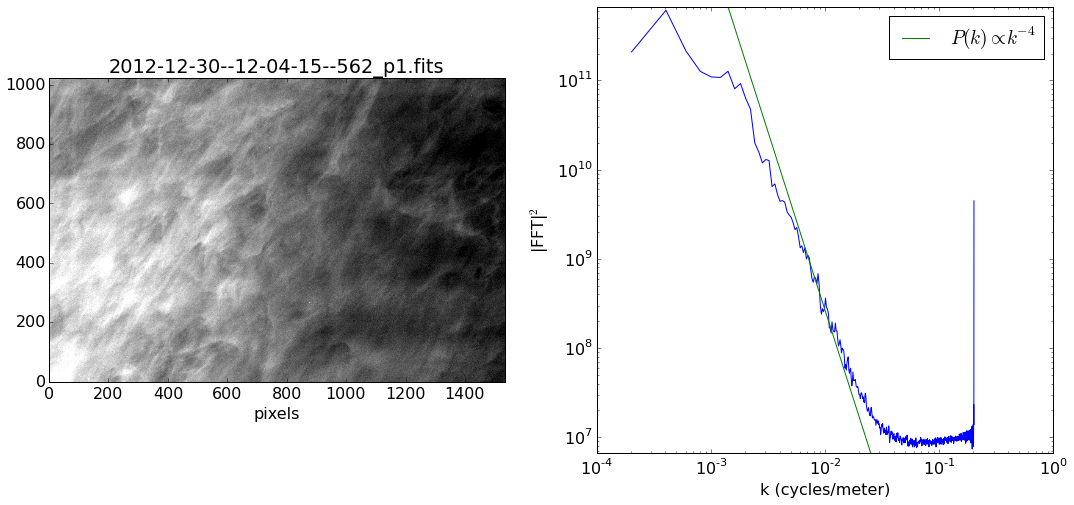

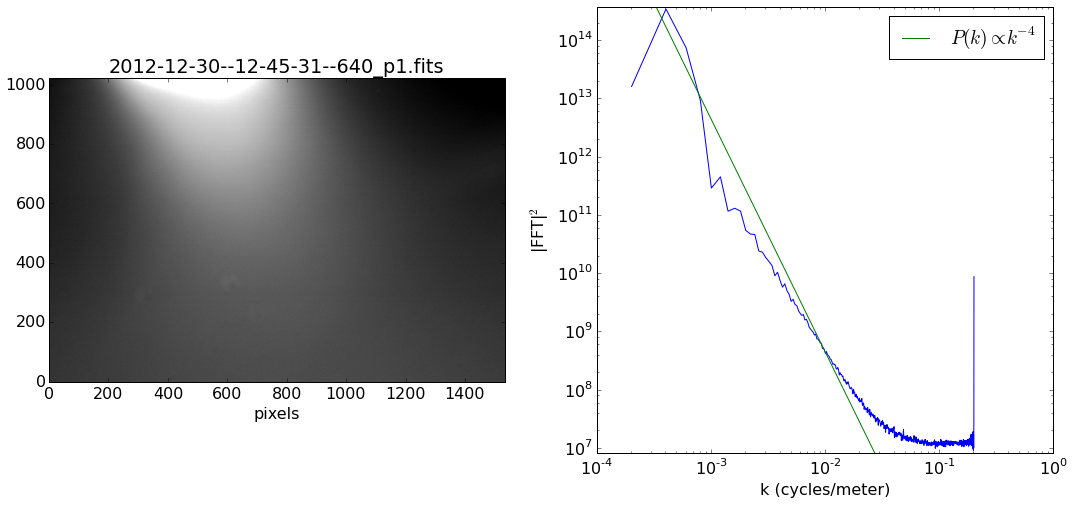

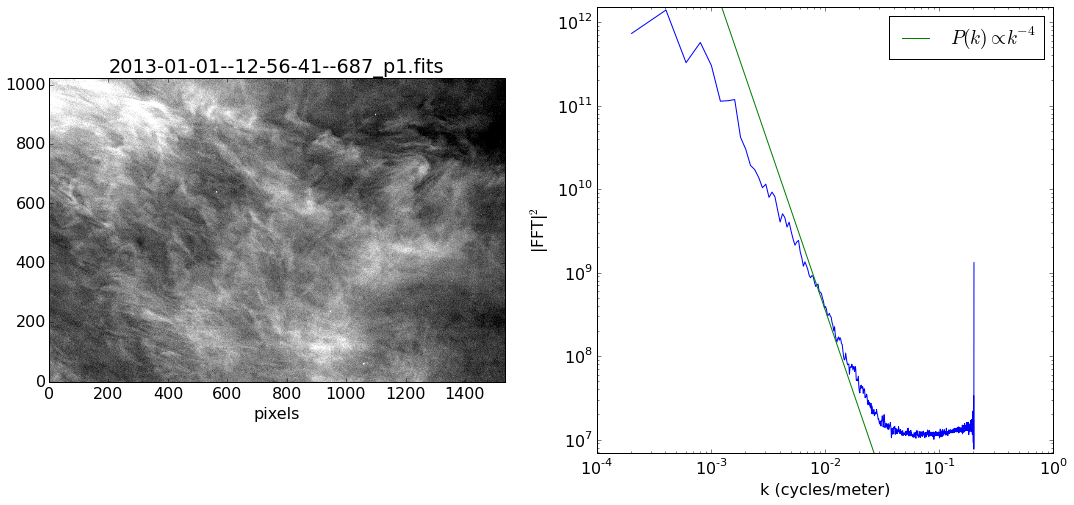

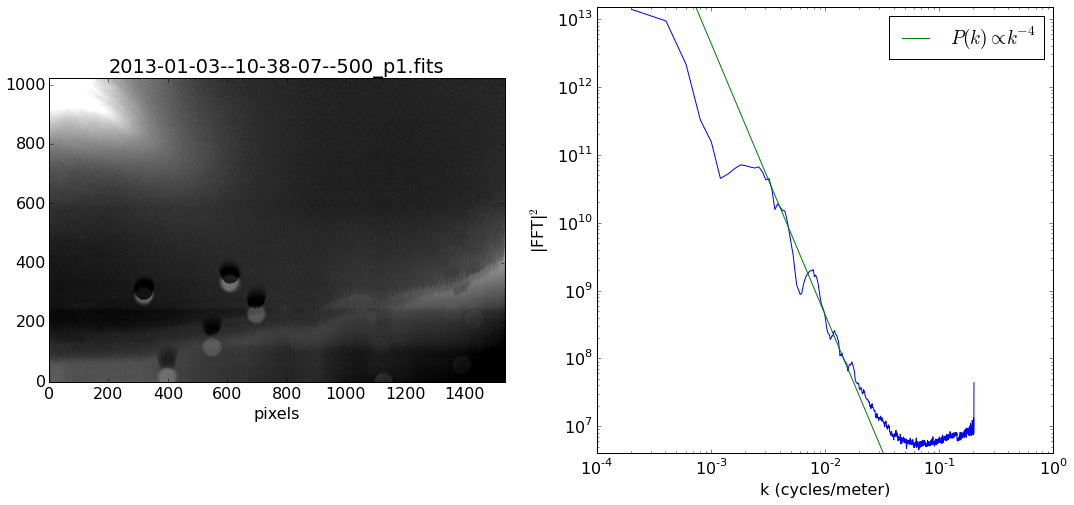

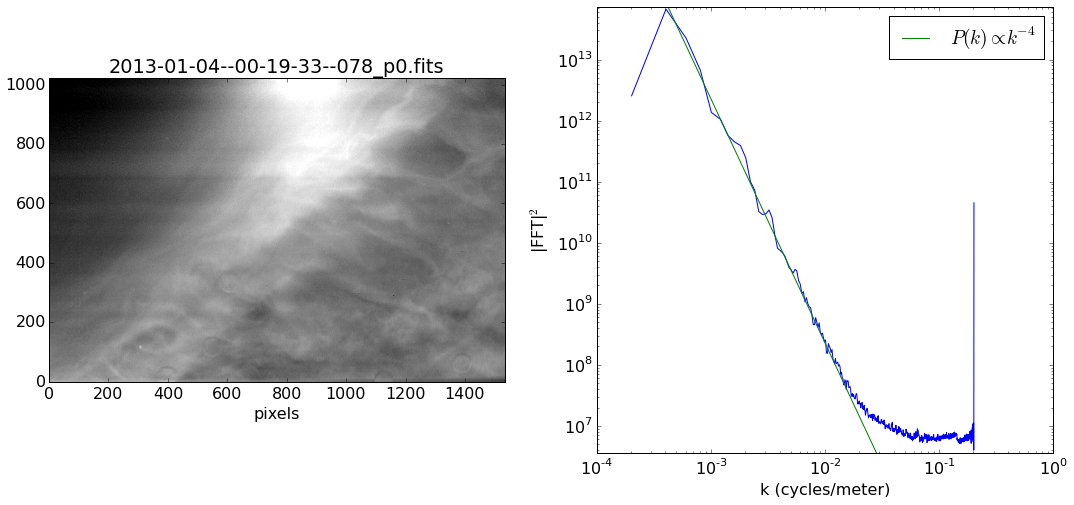

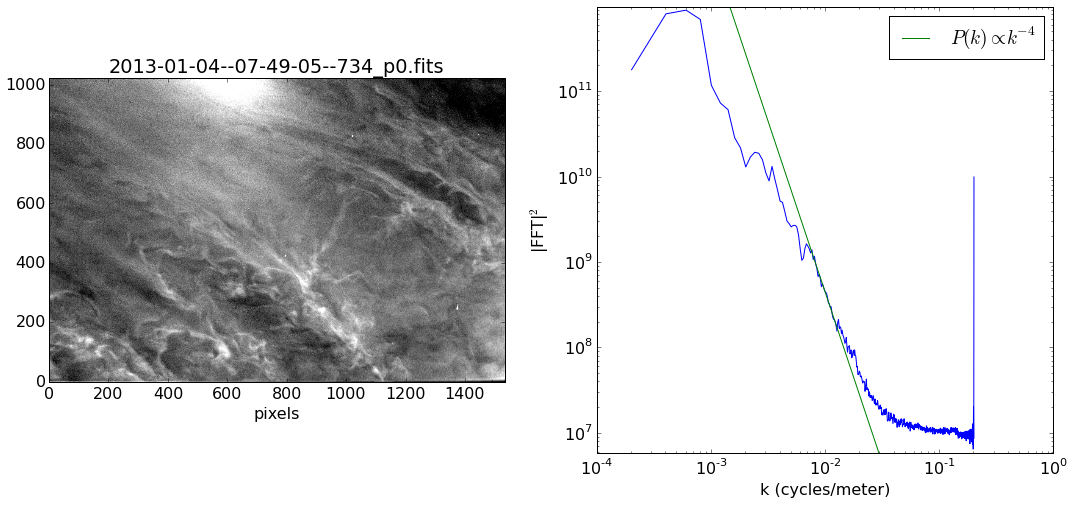

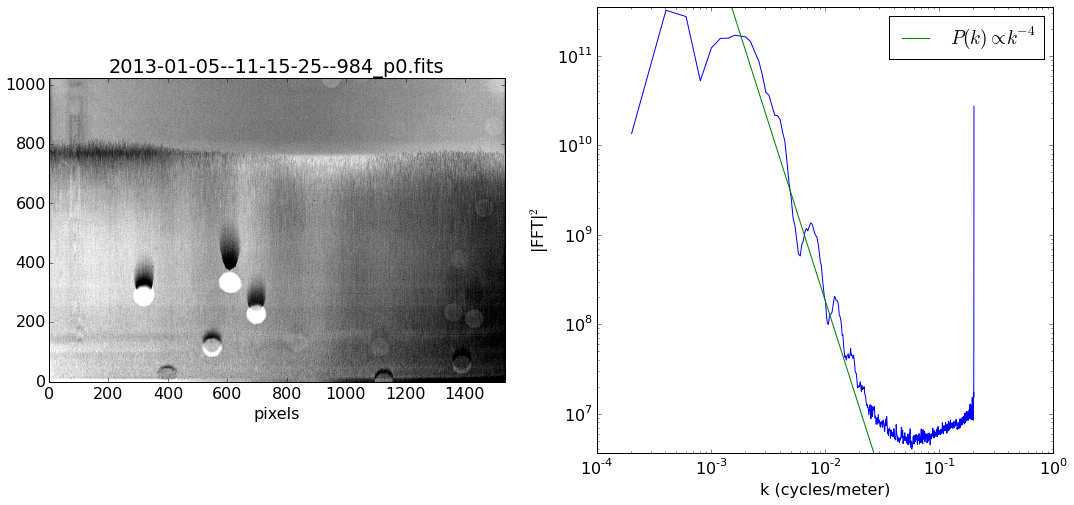

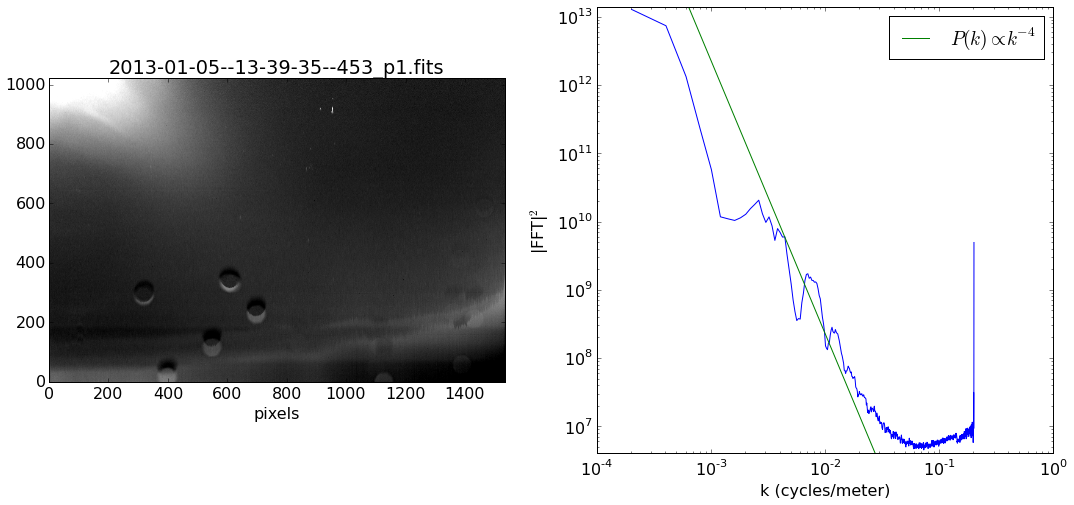

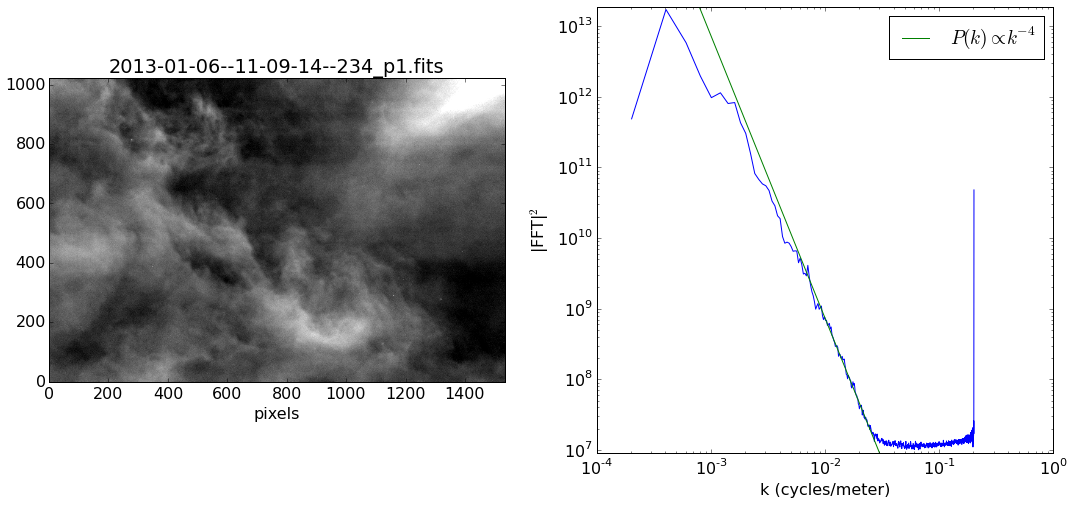

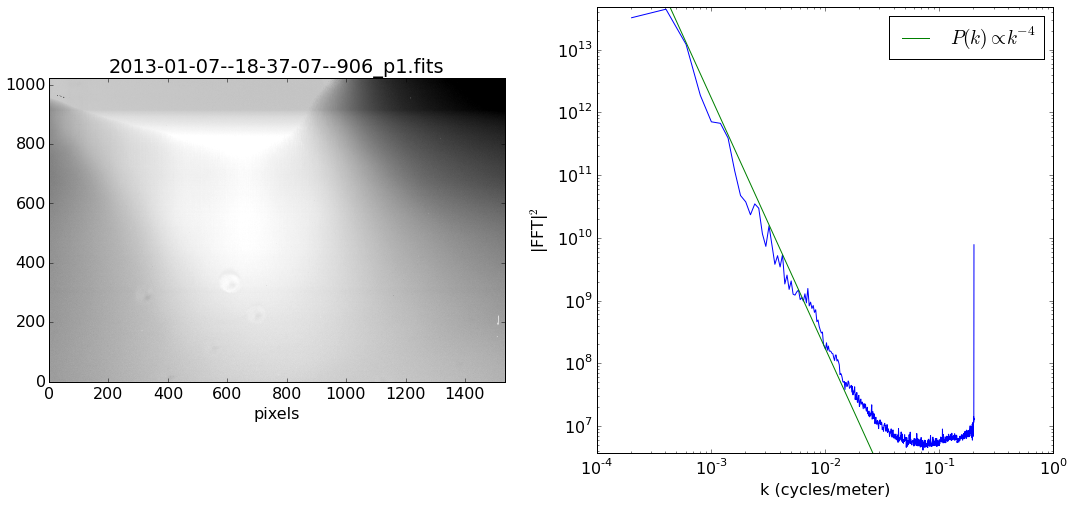

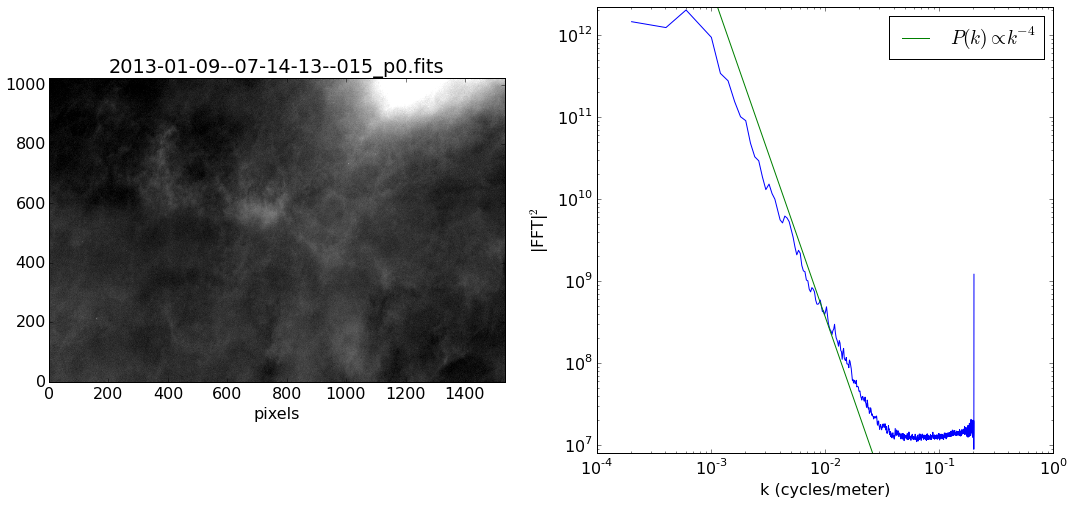

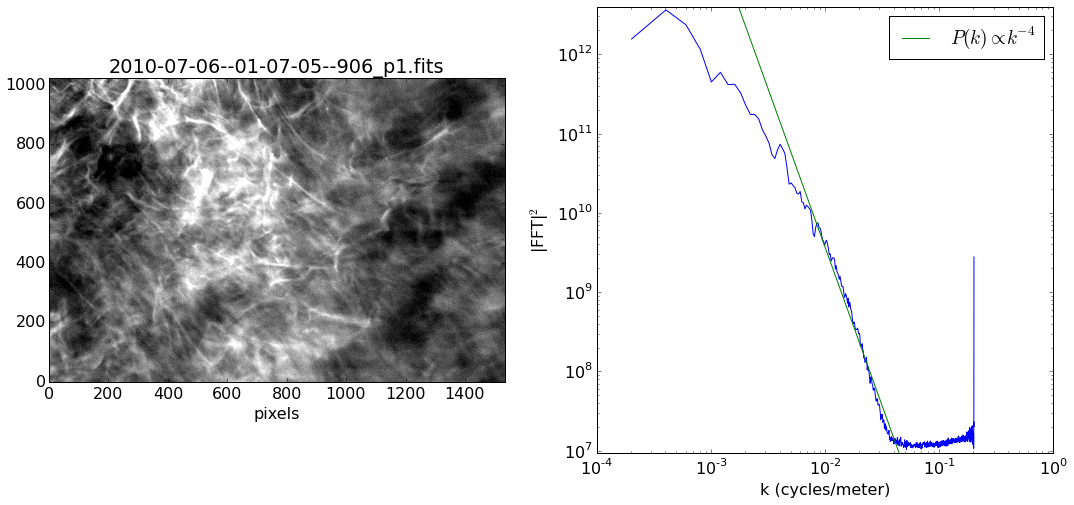

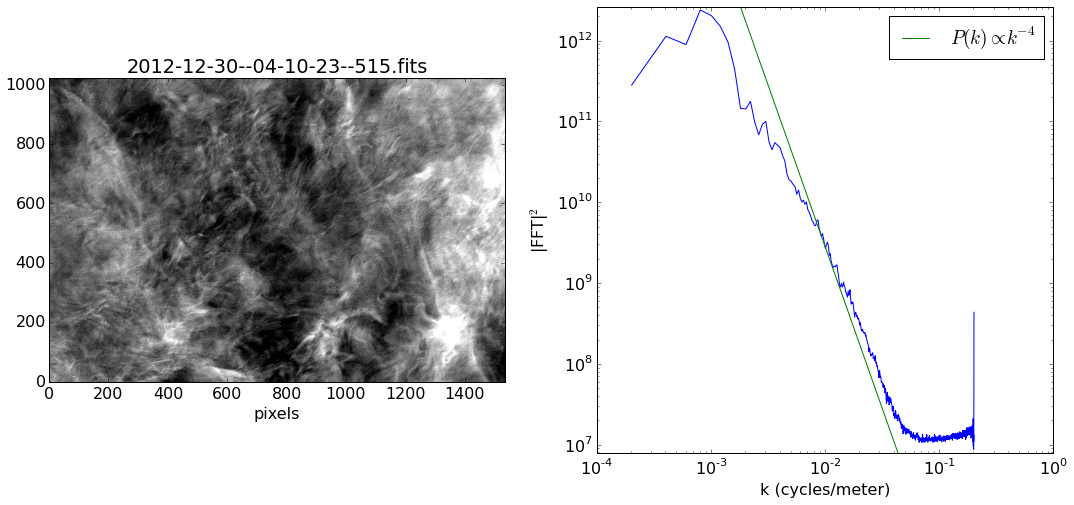

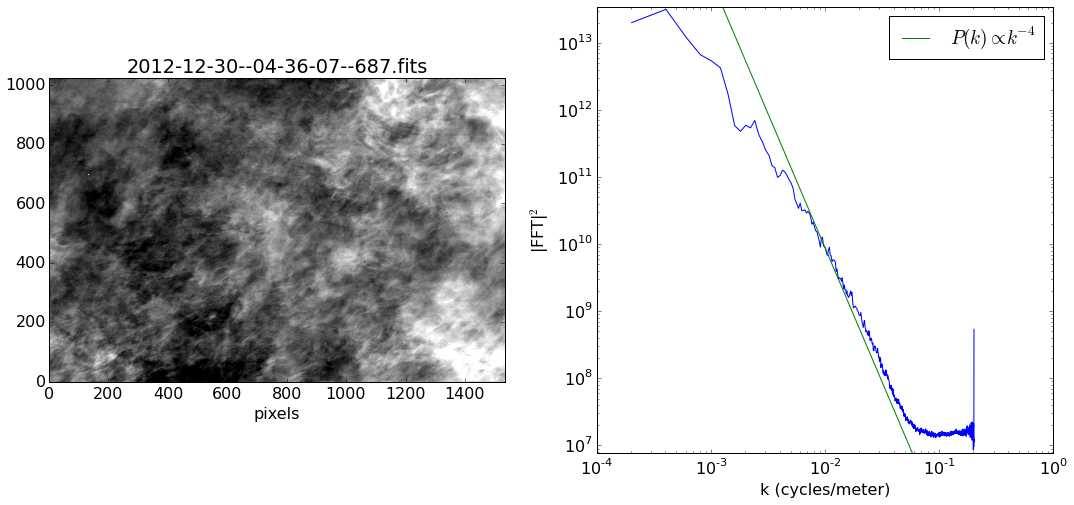

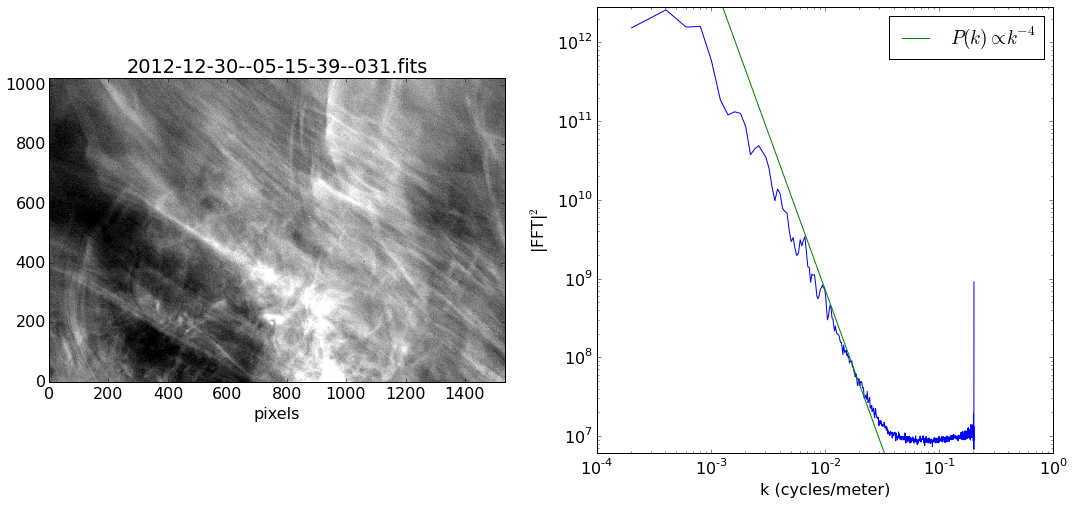

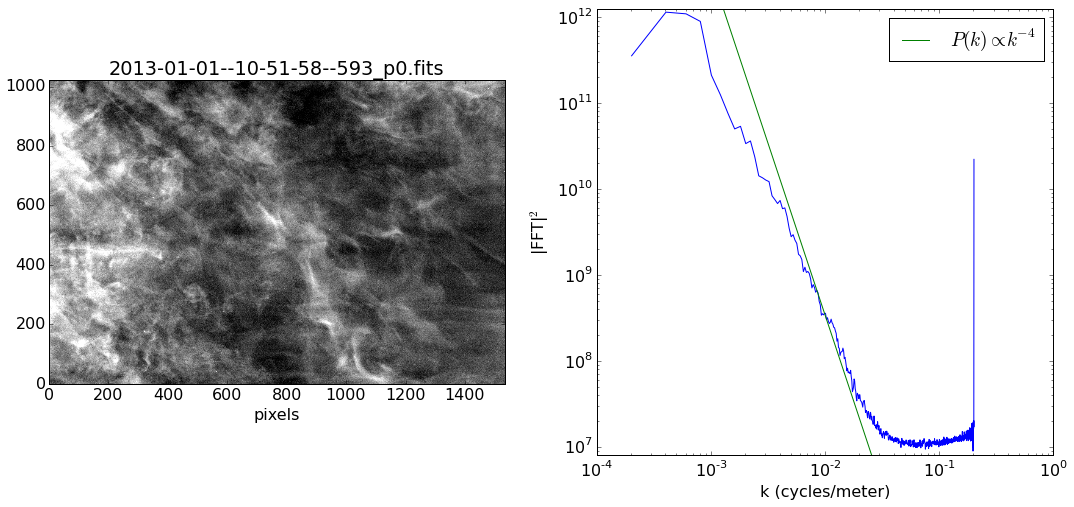

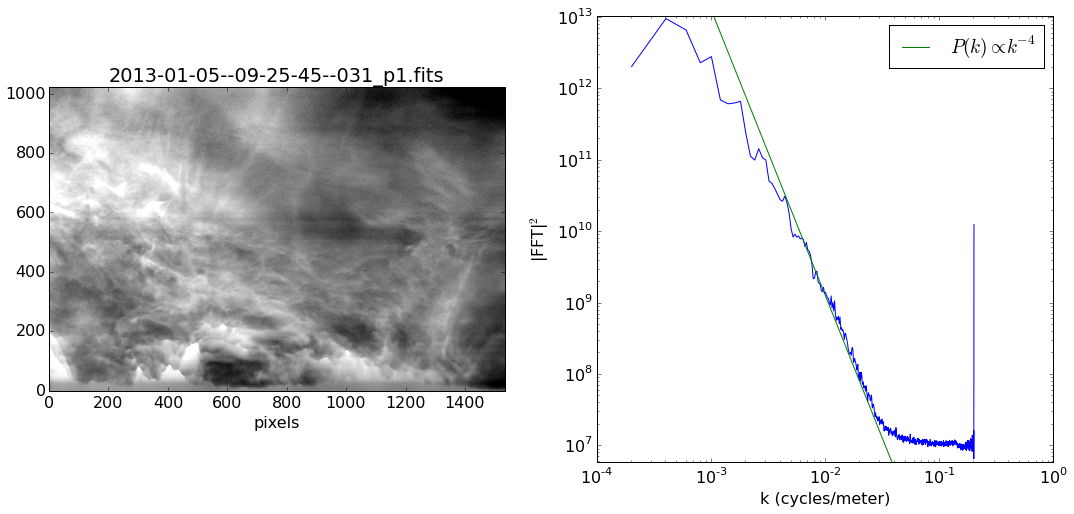

In [141]:
for k,row in dd.iterrows():
    if k % 5 != 0:
        continue
    plot_row(row)

#Aside: star dominated images

In [135]:
dd = df[(df.p3/df.p2 < 10) & (df.p2/df.p1 > 5)]

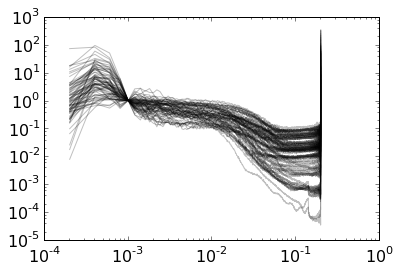

In [136]:
for k,row in dd.iterrows():
    loglog(row.kr,row.prr/row.prr[4],'k',alpha=.25)

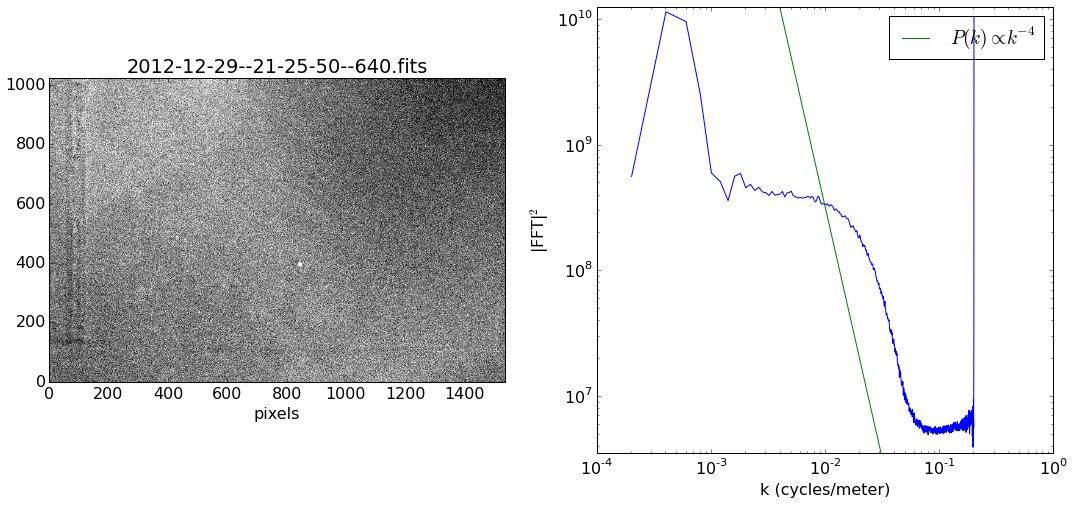

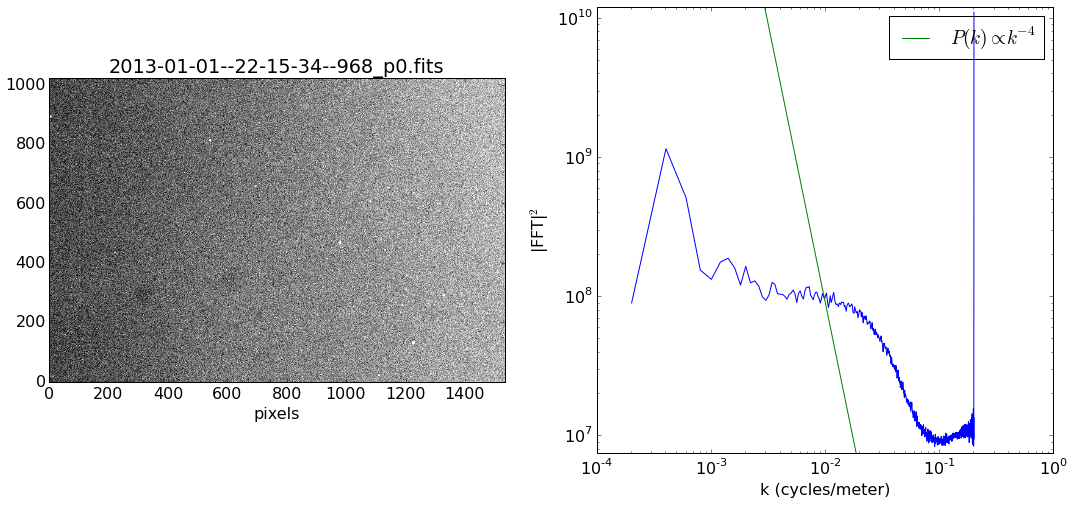

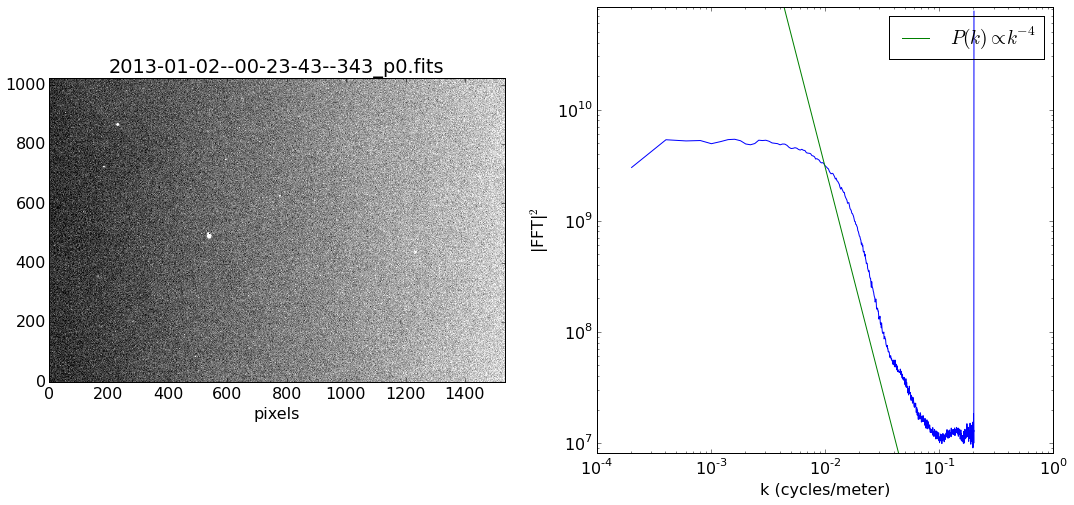

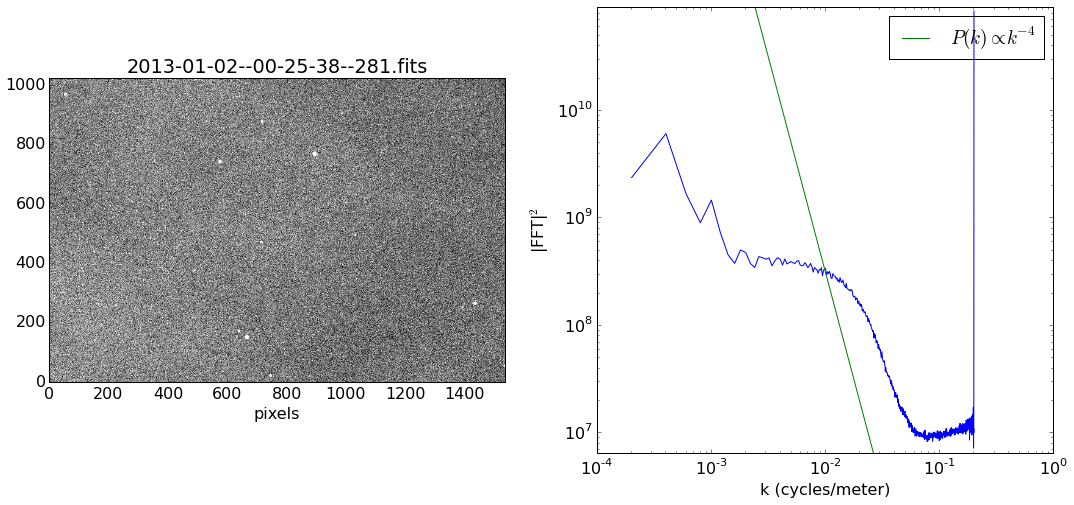

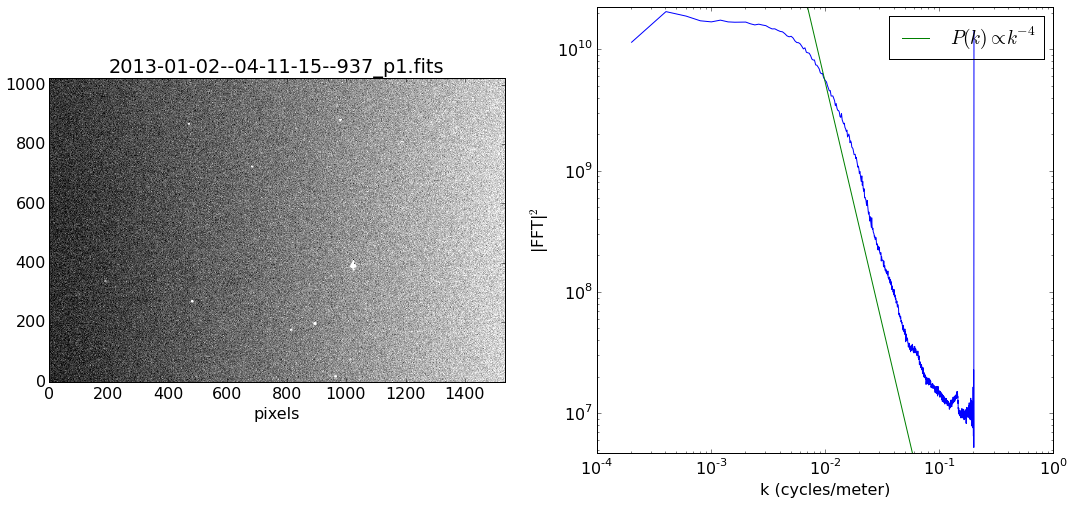

In [137]:
for k,row in dd.head().iterrows():
    plot_row(row)